In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.seterr(over='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'ignore', 'under': 'ignore'}

In [11]:
def load_dataset(file_name):
    data = np.loadtxt(file_name)
    features = data[:,:2]
    labels = data[:,-1]
    labels = np.reshape(labels,(-1,1))
    return features, labels

In [12]:
train_A_x, train_A_y = load_dataset('hwk2data/hwk2data/classificationA.train')
train_B_x, train_B_y = load_dataset('hwk2data/hwk2data/classificationB.train')
train_C_x, train_C_y = load_dataset('hwk2data/hwk2data/classificationC.train')

test_A_x, test_A_y = load_dataset('hwk2data/hwk2data/classificationA.test')
test_B_x, test_B_y = load_dataset('hwk2data/hwk2data/classificationB.test')
test_C_x, test_C_y = load_dataset('hwk2data/hwk2data/classificationC.test')

In [13]:
def plot_data(train_x, train_y, w, title):
    train_y = train_y.flatten()
    beta = w[1:]
    gamma = w[0]
    y_1_idx = np.where(train_y == 1)
    y_0_idx = np.where(train_y == 0)
    feat_1 = train_x[y_1_idx]
    feat_0 = train_x[y_0_idx]
    # print feat_1.shape
    # print feat_0.shape
    plt.plot(feat_1[:,0],feat_1[:,1],'+',label='y=1')
    plt.plot(feat_0[:,0],feat_0[:,1],'x',label='y=0')
    plt.plot(train_x[:,0],(0.5 - beta[0,0]*train_x[:,0] - gamma)/beta[1,0],label='f(x)=0.5')
#    plt.plot(mu_0[0,0],mu_0[0,1], marker='o', markersize=3, color="red")
#    plt.plot(mu_1[0,0],mu_1[0,1], marker='o', markersize=3, color="blue")
    plt.title(title)
    plt.legend()
    plt.show()
    

In [14]:
def train_linear_regression(train_x, train_y):
    X_pad = np.concatenate((np.ones([train_x.shape[0],1]), train_x),axis=1)
    w = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_pad),X_pad)),np.matmul(np.transpose(X_pad),train_y))
    
    return w

In [15]:
def calculate_err(test_x, test_y, w):
    test_y = np.reshape(test_y,(-1,1))
    out_labels = np.zeros_like(test_y)
    

    out_prob = np.reshape(w[1,0]*test_x[:,0] + w[2,0]*test_x[:,1],(-1,1)) \
    + w[0,0]*np.ones((test_x.shape[0],1))
    
    out_labels[out_prob >= 0.5] = 1.0
    out_labels[out_prob < 0.5] = 0.0
    
    err = np.sum(np.abs(test_y - out_labels))/test_y.shape[0]
    return err

w = 
[[-0.2640075 ]
 [-0.37259311]]
bias(b) = 0.492292


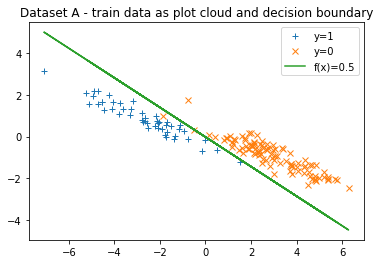

Misclassification error for train dataset A = 1.33 %
Misclassification error for test dataset A = 2.07 %


In [16]:
w = train_linear_regression(train_A_x, train_A_y)
print 'w = '
print w[1:]
print 'bias(b) = %f' % w[0]
plot_data(train_A_x, train_A_y, w,'Dataset A - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset A = %.2f %%' % (100*calculate_err(train_A_x, train_A_y, w))
print 'Misclassification error for test dataset A = %.2f %%' % (100*calculate_err(test_A_x, test_A_y, w))

w = 
[[-0.10424575]
 [ 0.05179118]]
bias(b) = 0.500050


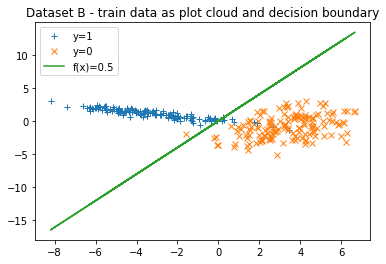

Misclassification error for train dataset B = 3.00 %
Misclassification error for test dataset B = 4.15 %


In [17]:
w = train_linear_regression(train_B_x, train_B_y)
print 'w = '
print w[1:]
print 'bias(b) = %f' % w[0]
plot_data(train_B_x, train_B_y, w,'Dataset B - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset B = %.2f %%' % (100*calculate_err(train_B_x, train_B_y, w))
print 'Misclassification error for test dataset B = %.2f %%' % (100*calculate_err(test_B_x, test_B_y, w))

w = 
[[-0.12769333]
 [-0.01700142]]
bias(b) = 0.508400


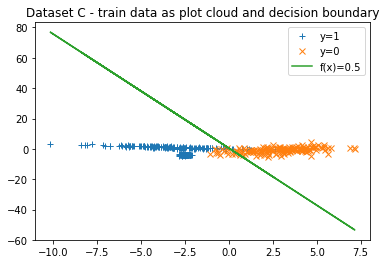

Misclassification error for train dataset C = 5.50 %
Misclassification error for test dataset C = 4.23 %


In [18]:
w = train_linear_regression(train_C_x, train_C_y)
print 'w = '
print w[1:]
print 'bias(b) = %f' % w[0]
plot_data(train_C_x, train_C_y, w, 'Dataset C - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset C = %.2f %%' % (100*calculate_err(train_C_x, train_C_y, w))
print 'Misclassification error for test dataset C = %.2f %%' % (100*calculate_err(test_C_x, test_C_y, w))